# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.241  1  0.385 0.536 0.002   
                             age        0.162  1  0.259 0.612 0.001   
                             Kiel       2.248  1  3.583 0.060 0.018   
                             Magdeburg  5.088  1  8.109 0.005 0.041   
                             Sweden     7.758  1 12.363 0.001 0.061   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.273  1  0.273 0.602 0.001   
                             age        1.518  1  1.520 0.219 0.008   
                             Kiel       0.001  1  0.001 0.979 0.000   
                             Magdeburg  3.467  1  3.471 0.064 0.018   
                             Sweden    15.283  1 15.301 0.000 0.074   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.271  0.680    False  
                             age               0.213  0.746    False  
                             Kiel              1.223  0.141    False  
                             Magdeburg         2.311  0.019     True  
                             Sweden            3.262  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.221  0.737    False  
                             age               0.659  0.370    False  
                             Kiel              0.009  0.988    False  
                             Magdeburg         1.194  0.148    False  
                             Sweden            3.895  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.618  1  3.728 0.055 0.019   
                             age        0.014  1  0.083 0.774 0.000   
                             Kiel       0.437  1  2.640 0.106 0.014   
                             Magdeburg  1.016  1  6.131 0.014 0.031   
                             Sweden     2.454  1 14.813 0.000 0.072   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.930  1  1.072 0.302 0.006   
                             age        2.447  1  1.359 0.245 0.007   
                             Kiel       8.513  1  4.727 0.031 0.024   
                             Magdeburg 11.381  1  6.319 0.013 0.032   
                             Sweden     1.126  1  0.625 0.430 0.003   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.260  0.122    False  
                             age               0.111  0.852    False  
                             Kiel              0.975  0.205    False  
                             Magdeburg         1.849  0.041     True  
                             Sweden            3.791  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.520  0.452    False  
                             age               0.611  0.389    False  
                             Kiel              1.510  0.078    False  
                             Magdeburg         1.894  0.038     True  
                             Sweden            0.366  0.580    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.536         0.271  0.680    False   
                             Kiel      0.060         1.223  0.141    False   
                             Magdeburg 0.005         2.311  0.019     True   
                             Sweden    0.001         3.262  0.003     True   
                             age       0.612         0.213  0.746    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.602         0.221  0.737    False   
                             Kiel      0.979         0.009  0.988    False   
                             Magdeburg 0.064         1.194  0.148    False   
                             Sweden    0.000         3.895  0.001     True   
                             age       0.219         0.659  0.370    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.055         1.260  0.122    False  
                             Kiel      0.106         0.975  0.205    False  
                             Magdeburg 0.014         1.849  0.041     True  
                             Sweden    0.000         3.791  0.001     True  
                             age       0.774         0.111  0.852    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.302         0.520  0.452    False  
                             Kiel      0.031         1.510  0.078    False  
                             Magdeburg 0.013         1.894  0.038     True  
                             Sweden    0.430         0.366  0.580    False  
                             age       0.245         0.611  0.389    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.482     0.338     0.246         2.738     0.313
std       0.304         5.324     0.332     0.299         5.157     0.327
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.335     0.016     0.002         0.357     0.008
50%       0.121         0.918     0.242     0.092         1.038     0.183
75%       0.463         2.411     0.617     0.440         2.686     0.586
max       1.000       147.415     1.000     0.999        83.792     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_51074/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.536         0.271   
A0A024R0T9;K7ER74;P02655                           AD     0.060         1.219   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.069         1.162   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.529         0.277   
A0A075B6H7                                         AD     0.167         0.777   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.100         0.999   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.938         0.028   
S4R3U6                                             AD     0.602         0.221   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.680    False   
A0A024R0T9;K7ER74;P02655                           AD      0.142    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.156    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.676    False   
A0A075B6H7                                         AD      0.304    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.210    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.965    False   
S4R3U6                                             AD      0.737    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.055         1.260   
A0A024R0T9;K7ER74;P02655                           AD     0.032         1.500   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.310         0.509   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.301         0.521   
A0A075B6H7                                         AD     0.020         1.697   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.047         1.325   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.594         0.226   
S4R3U6                                             AD     0.302         0.520   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.122    False  
A0A024R0T9;K7ER74;P02655                           AD      0.079    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.460    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.451    False  
A0A075B6H7                                         AD      0.055    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.253         1.396     0.335     0.245         1.494     0.318
std       0.290         1.629     0.316     0.288         1.747     0.314
min       0.000         0.002     0.000     0.000         0.000     0.000
25%       0.013         0.362     0.041     0.009         0.362     0.028
50%       0.122         0.915     0.242     0.103         0.986     0.201
75%       0.435         1.898     0.592     0.434         2.046     0.582
max       0.996        23.541     0.997     0.999        21.494     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1043,996


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.536         0.271  0.680   
A0A024R0T9;K7ER74;P02655                           0.060         1.219  0.142   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.069         1.162  0.156   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.529         0.277  0.676   
A0A075B6H7                                         0.167         0.777  0.304   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.100         0.999  0.210   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.938         0.028  0.965   
S4R3U6                                             0.602         0.221  0.737   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.055   
A0A024R0T9;K7ER74;P02655                              False 0.032   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.310   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.301   
A0A075B6H7                                            False 0.020   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.047   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.594   
S4R3U6                                                False 0.302   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.260  0.122   
A0A024R0T9;K7ER74;P02655                                   1.500  0.079   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.509  0.460   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.521  0.451   
A0A075B6H7                                                 1.697  0.055   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.302   
Q9Y6X5                                                     1.325  0.109   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.170   
Q9Y6Y9                                                     0.226  0.719   
S4R3U6                                                     0.520  0.452   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    969
PI (yes) - QRILC (yes)   351
PI (no)  - QRILC (yes)    74
PI (yes) - QRILC (no)     27
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_51074/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A075B6I0                               0.026         1.584  0.073    False   
A0A075B6S5                               0.230         0.638  0.383    False   
A0A087WWT2;Q9NPD7                        0.101         0.995  0.211    False   
A0A087X0M8                               0.030         1.516  0.082    False   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.010         1.999  0.034     True   
...                                        ...           ...    ...      ...   
Q9NZR2                                   0.031         1.514  0.083    False   
Q9NZU1                                   0.002         2.636  0.010     True   
Q9P0K9                                   0.029         1.534  0.080    False   
Q9ULP0-3;Q9ULP0-6                        0.043         1.364  0.109    False   
Q9UQ52                                   0.102         0.993  0.212    False   

                                         QRILC                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A075B6I0                               0.002         2.625  0.009     True   
A0A075B6S5                               0.013         1.872  0.039     True   
A0A087WWT2;Q9NPD7                        0.005         2.306  0.017     True   
A0A087X0M8                               0.008         2.075  0.027     True   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.075         1.125  0.157    False   
...                                        ...           ...    ...      ...   
Q9NZR2                                   0.011         1.978  0.032     True   
Q9NZU1                                   0.480         0.319  0.621    False   
Q9P0K9                                   0.008         2.095  0.026     True   
Q9ULP0-3;Q9ULP0-6                        0.011         1.969  0.033     True   
Q9UQ52                                   0.002         2.645  0.009     True   

                                              data  
                                         frequency  
protein groups                                      
A0A075B6I0                                     194  
A0A075B6S5                                     129  
A0A087WWT2;Q9NPD7                              193  
A0A087X0M8                                     189  
A0A087X152;D6RE16;E0CX15;O95185;O95185-2       176  
...                                            ...  
Q9NZR2                                         145  
Q9NZU1                                          72  
Q9P0K9                                         192  
Q9ULP0-3;Q9ULP0-6                              136  
Q9UQ52                                         188  

[101 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.680,0.122,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.142,0.079,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.156,0.460,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.676,0.451,196,PI (no) - QRILC (no)
A0A075B6H7,0.304,0.055,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.315,0.302,197,PI (no) - QRILC (no)
Q9Y6X5,0.210,0.109,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.170,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.911,0.009,86,PI (no) - QRILC (yes),0.902
F2Z2C8;Q9BVH7,0.723,0.018,93,PI (no) - QRILC (yes),0.706
Q9NZU1,0.010,0.621,72,PI (yes) - QRILC (no),0.611
A0A1W2PQ94;B4DS77;B4DS77-2;B4DS77-3,0.487,0.014,69,PI (no) - QRILC (yes),0.473
Q96EU7,0.447,0.028,142,PI (no) - QRILC (yes),0.419
...,...,...,...,...,...
P17405;P17405-4,0.049,0.069,159,PI (yes) - QRILC (no),0.020
P20916;P20916-2;P20916-3,0.041,0.058,170,PI (yes) - QRILC (no),0.017
P26572,0.059,0.046,194,PI (no) - QRILC (yes),0.013


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


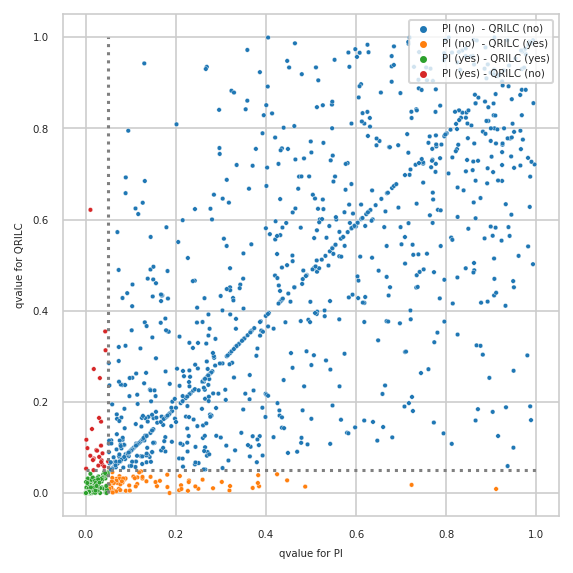

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


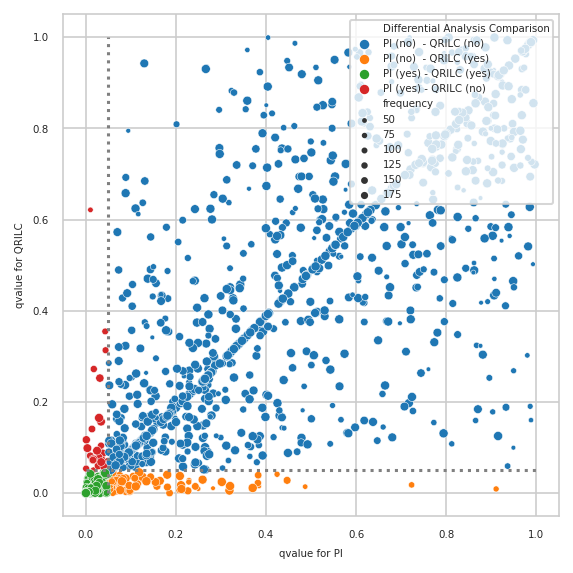

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
MAPT,ENSP00000340820,4.800
...,...,...
LPIN3,ENSP00000487971,0.681
HECTD1,ENSP00000382269,0.681
ETNK1,ENSP00000500633,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/9315d83d47168fa3da1739d7e683ad72_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out